In [17]:
import os
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True) #do not miss this line

from gensim import corpora, models, similarities

import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd
os.chdir('C:\\Users\\Glynis\\Documents\\MSc A U Chicago\\Capstone')
datafile=pd.read_csv('forpython.csv',encoding='latin1')
datafile=datafile[~(datafile['created_at'].str.len() < 30)]
tweets = datafile.assign(Time=pd.to_datetime(datafile.created_at)).drop('id', axis='columns')


In [6]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
tweets['Time'] = pd.to_datetime(tweets['Time'], format='%y-%m-%d %H:%M:%S')
tweetsT = tweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Time',
    height=450,
    width=1200,
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [7]:
corpus=[]
a=[]
for i in range(len(tweets['text'])):
        a=tweets['text'][i]
        corpus.append(a)
        
corpus[0:5]

['Ready to hop on the ninja turtle hype train #Injustice2 ??',
 'Went to the multiverse to start up my legendary gear grind again then boom THE FUCKING JUSTICE LEAGUE MULTIVERSES A\x85 ',
 'dccomics warnerbrosentertainment @wbpictures_br #newreview #injustice2 _injustice2_ #games\x85 ',
 "The one and only Scorpion with a dirty fatality. The game is Mortal Kombat XL. I'm addicted to\x85 ",
 'Yeah Kitana is legit. But Miss Sonya Blade was whooping ass with the hand to hand combat. Queen of agility ']

In [8]:
import gensim
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\Glynis\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [9]:
from nltk.corpus import stopwords
from string import punctuation

# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

In [10]:
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use

2018-05-25 12:07:02,007 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-25 12:07:02,165 : INFO : adding document #10000 to Dictionary(21481 unique tokens: ['#injustice2', '??', 'hop', 'hype', 'ninja']...)
2018-05-25 12:07:02,325 : INFO : adding document #20000 to Dictionary(35131 unique tokens: ['#injustice2', '??', 'hop', 'hype', 'ninja']...)
2018-05-25 12:07:02,471 : INFO : adding document #30000 to Dictionary(47340 unique tokens: ['#injustice2', '??', 'hop', 'hype', 'ninja']...)
2018-05-25 12:07:02,611 : INFO : adding document #40000 to Dictionary(57721 unique tokens: ['#injustice2', '??', 'hop', 'hype', 'ninja']...)
2018-05-25 12:07:02,750 : INFO : adding document #50000 to Dictionary(67487 unique tokens: ['#injustice2', '??', 'hop', 'hype', 'ninja']...)
2018-05-25 12:07:02,890 : INFO : adding document #60000 to Dictionary(77467 unique tokens: ['#injustice2', '??', 'hop', 'hype', 'ninja']...)
2018-05-25 12:07:03,025 : INFO : adding document #70000 to Dictiona

In [11]:
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2018-05-25 12:07:06,296 : INFO : collecting document frequencies
2018-05-25 12:07:06,298 : INFO : PROGRESS: processing document #0
2018-05-25 12:07:06,334 : INFO : PROGRESS: processing document #10000
2018-05-25 12:07:06,363 : INFO : PROGRESS: processing document #20000
2018-05-25 12:07:06,394 : INFO : PROGRESS: processing document #30000
2018-05-25 12:07:06,420 : INFO : PROGRESS: processing document #40000
2018-05-25 12:07:06,444 : INFO : PROGRESS: processing document #50000
2018-05-25 12:07:06,468 : INFO : PROGRESS: processing document #60000
2018-05-25 12:07:06,494 : INFO : PROGRESS: processing document #70000
2018-05-25 12:07:06,525 : INFO : PROGRESS: processing document #80000
2018-05-25 12:07:06,558 : INFO : calculating IDF weights for 89158 documents and 105651 features (851077 matrix non-zeros)


In [12]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [13]:
total_topics = 6
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2018-05-25 12:07:06,812 : INFO : using symmetric alpha at 0.16666666666666666
2018-05-25 12:07:06,813 : INFO : using symmetric eta at 0.16666666666666666
2018-05-25 12:07:06,830 : INFO : using serial LDA version on this node
2018-05-25 12:07:06,905 : INFO : running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 89158 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-25 12:07:06,906 : INFO : PROGRESS: pass 0, at document #2000/89158
2018-05-25 12:07:07,820 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:07,954 : INFO : topic #5 (0.167): 0.040*"mortal" + 0.034*"kombat" + 0.017*"@noobde" + 0.012*"@youtube" + 0.012*"#injustice2" + 0.011*"@netherrealm" + 0.011*"video" + 0.008*"liked" + 0.007*"turtles" + 0.007*"one"
2018-05-25 12:07:07,956 : INFO : topic #1 (0.167): 0.036*"#injustice2" + 0.029*"mortal" 

2018-05-25 12:07:11,973 : INFO : topic #2 (0.167): 0.096*"mortal" + 0.085*"kombat" + 0.015*"like" + 0.008*"game" + 0.008*"video" + 0.006*"play" + 0.006*"played" + 0.006*"street" + 0.005*"#mortalkombat" + 0.004*"x"
2018-05-25 12:07:11,976 : INFO : topic diff=0.164751, rho=0.408248
2018-05-25 12:07:11,978 : INFO : PROGRESS: pass 0, at document #14000/89158
2018-05-25 12:07:12,533 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:12,615 : INFO : topic #1 (0.167): 0.028*"#injustice2" + 0.017*"mortal" + 0.010*"kombat" + 0.009*"new" + 0.008*"injustice" + 0.008*"#mortalkombat" + 0.007*"2" + 0.006*"@noobde" + 0.006*"@netherrealm" + 0.006*"like"
2018-05-25 12:07:12,617 : INFO : topic #3 (0.167): 0.087*"mortal" + 0.080*"kombat" + 0.038*"@youtube" + 0.034*"video" + 0.019*"liked" + 0.013*"x" + 0.011*"via" + 0.010*"added" + 0.010*"playlist" + 0.007*"playing"
2018-05-25 12:07:12,619 : INFO : topic #0 (0.167): 0.021*"@netherrealm" + 0.016*"mortal" + 0.016*"

2018-05-25 12:07:16,732 : INFO : topic #4 (0.167): 0.023*"#injustice2" + 0.009*"2" + 0.009*"@netherrealm" + 0.008*"injustice" + 0.006*"mortal" + 0.006*"one" + 0.005*"edition" + 0.005*"@noobde" + 0.005*"get" + 0.004*"black"
2018-05-25 12:07:16,736 : INFO : topic diff=0.168100, rho=0.288675
2018-05-25 12:07:16,738 : INFO : PROGRESS: pass 0, at document #26000/89158
2018-05-25 12:07:17,214 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:17,291 : INFO : topic #1 (0.167): 0.015*"#injustice2" + 0.010*"#mortalkombat" + 0.010*"mortal" + 0.008*"new" + 0.006*"annihilation" + 0.006*"@noobde" + 0.005*"??" + 0.005*"kombat" + 0.005*"@netherrealm" + 0.004*"injustice"
2018-05-25 12:07:17,293 : INFO : topic #5 (0.167): 0.045*"mortal" + 0.039*"kombat" + 0.009*"game" + 0.008*"2" + 0.007*"games" + 0.007*"top" + 0.006*"@noobde" + 0.006*"super" + 0.006*"2." + 0.005*"@netherrealm"
2018-05-25 12:07:17,295 : INFO : topic #2 (0.167): 0.110*"mortal" + 0.095*"kombat" 

2018-05-25 12:07:19,924 : INFO : topic diff=0.170248, rho=0.235702
2018-05-25 12:07:19,926 : INFO : PROGRESS: pass 0, at document #38000/89158
2018-05-25 12:07:20,353 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:20,429 : INFO : topic #1 (0.167): 0.021*"#mortalkombat" + 0.013*"#injustice2" + 0.011*"new" + 0.011*"vote" + 0.009*"#chrome" + 0.009*"difference!" + 0.008*"make" + 0.006*"??" + 0.006*"@netherrealm" + 0.005*"mortal"
2018-05-25 12:07:20,431 : INFO : topic #5 (0.167): 0.038*"mortal" + 0.033*"kombat" + 0.008*"2" + 0.008*"game" + 0.006*"top" + 0.006*"super" + 0.006*"vs" + 0.005*"games" + 0.005*"@noobde" + 0.005*"3"
2018-05-25 12:07:20,433 : INFO : topic #4 (0.167): 0.040*"#injustice2" + 0.013*"@netherrealm" + 0.012*"legendary" + 0.011*"injustice" + 0.011*"2" + 0.011*"@injusticegame" + 0.009*"gear" + 0.009*"edition" + 0.008*"may" + 0.008*"@zelina_vegawwe"
2018-05-25 12:07:20,435 : INFO : topic #2 (0.167): 0.102*"mortal" + 0.087*"kombat

2018-05-25 12:07:23,728 : INFO : topic diff=0.161705, rho=0.204124
2018-05-25 12:07:23,730 : INFO : PROGRESS: pass 0, at document #50000/89158
2018-05-25 12:07:24,132 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:24,208 : INFO : topic #3 (0.167): 0.096*"mortal" + 0.092*"kombat" + 0.041*"@youtube" + 0.039*"video" + 0.022*"liked" + 0.020*"x" + 0.012*"via" + 0.009*"added" + 0.009*"playlist" + 0.007*"xl"
2018-05-25 12:07:24,210 : INFO : topic #2 (0.167): 0.097*"mortal" + 0.081*"kombat" + 0.038*"v" + 0.038*"franchise." + 0.022*"like" + 0.012*"new" + 0.007*"play" + 0.007*"street" + 0.006*"sign" + 0.006*"#youwontknowuntilyouplay"
2018-05-25 12:07:24,212 : INFO : topic #4 (0.167): 0.037*"#injustice2" + 0.014*"injustice" + 0.012*"2" + 0.008*"@netherrealm" + 0.008*"legendary" + 0.008*"gear" + 0.008*"@injusticegame" + 0.007*"one" + 0.007*"edition" + 0.006*"#ps4share"
2018-05-25 12:07:24,215 : INFO : topic #1 (0.167): 0.071*"miss" + 0.033*"new" + 0.0

2018-05-25 12:07:27,111 : INFO : topic #2 (0.167): 0.152*"v" + 0.151*"franchise." + 0.063*"mortal" + 0.053*"kombat" + 0.019*"new" + 0.013*"like" + 0.010*"#youwontknowuntilyouplay" + 0.008*"sex" + 0.007*"porn" + 0.006*"street"
2018-05-25 12:07:27,114 : INFO : topic diff=0.178195, rho=0.182574
2018-05-25 12:07:27,116 : INFO : PROGRESS: pass 0, at document #62000/89158
2018-05-25 12:07:27,448 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:27,525 : INFO : topic #2 (0.167): 0.169*"v" + 0.168*"franchise." + 0.058*"mortal" + 0.048*"kombat" + 0.018*"new" + 0.012*"like" + 0.010*"#youwontknowuntilyouplay" + 0.008*"sex" + 0.007*"porn" + 0.006*"girls"
2018-05-25 12:07:27,527 : INFO : topic #0 (0.167): 0.152*"coming!" + 0.152*"epic" + 0.121*"mk" + 0.111*"#youwontknowuntilyouplay" + 0.107*"new" + 0.007*"@netherrealm" + 0.005*"@noobde" + 0.003*"back" + 0.002*"@tylerlansdown" + 0.002*"game"
2018-05-25 12:07:27,529 : INFO : topic #5 (0.167): 0.297*"sf" + 0

2018-05-25 12:07:29,749 : INFO : topic #4 (0.167): 0.024*"#injustice2" + 0.014*"@netherrealm" + 0.013*"2" + 0.009*"injustice" + 0.007*"one" + 0.007*"@injusticegame" + 0.007*"get" + 0.006*"#mortalkombat" + 0.005*"@noobde" + 0.005*"i'm"
2018-05-25 12:07:29,752 : INFO : topic diff=0.178778, rho=0.166667
2018-05-25 12:07:29,754 : INFO : PROGRESS: pass 0, at document #74000/89158
2018-05-25 12:07:30,094 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:30,170 : INFO : topic #4 (0.167): 0.025*"#injustice2" + 0.015*"@netherrealm" + 0.012*"2" + 0.009*"@injusticegame" + 0.008*"injustice" + 0.007*"get" + 0.007*"one" + 0.006*"#mortalkombat" + 0.005*"@noobde" + 0.005*"got"
2018-05-25 12:07:30,172 : INFO : topic #0 (0.167): 0.165*"coming!" + 0.165*"epic" + 0.144*"mk" + 0.138*"#youwontknowuntilyouplay" + 0.136*"new" + 0.003*"@netherrealm" + 0.002*"back" + 0.002*"@noobde" + 0.001*"franchise." + 0.001*"@tylerlansdown"
2018-05-25 12:07:30,175 : INFO : topic #

2018-05-25 12:07:33,284 : INFO : topic #0 (0.167): 0.165*"coming!" + 0.165*"epic" + 0.149*"mk" + 0.145*"new" + 0.145*"#youwontknowuntilyouplay" + 0.002*"back" + 0.002*"franchise." + 0.002*"@netherrealm" + 0.001*"@noobde" + 0.001*"@tylerlansdown"
2018-05-25 12:07:33,287 : INFO : topic #1 (0.167): 0.341*"miss" + 0.030*"new" + 0.015*"#youwontknowuntilyouplay" + 0.007*"#mortalkombat" + 0.005*"mk" + 0.003*"subscribe" + 0.003*"website" + 0.002*"shao" + 0.002*"make" + 0.002*"teen"
2018-05-25 12:07:33,290 : INFO : topic diff=0.224090, rho=0.154303
2018-05-25 12:07:33,291 : INFO : PROGRESS: pass 0, at document #86000/89158
2018-05-25 12:07:33,648 : INFO : merging changes from 2000 documents into a model of 89158 documents
2018-05-25 12:07:33,725 : INFO : topic #4 (0.167): 0.023*"#injustice2" + 0.018*"@netherrealm" + 0.010*"#mortalkombat" + 0.009*"2" + 0.008*"get" + 0.008*"@noobde" + 0.008*"injustice" + 0.007*"one" + 0.007*"i'm" + 0.005*"got"
2018-05-25 12:07:33,728 : INFO : topic #2 (0.167): 0.

In [14]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda
import pandas as pd

df_lda = pd.DataFrame(data_lda)
#print(df_lda.shape)
df_lda = df_lda.fillna(0).T
#print(df_lda.shape)

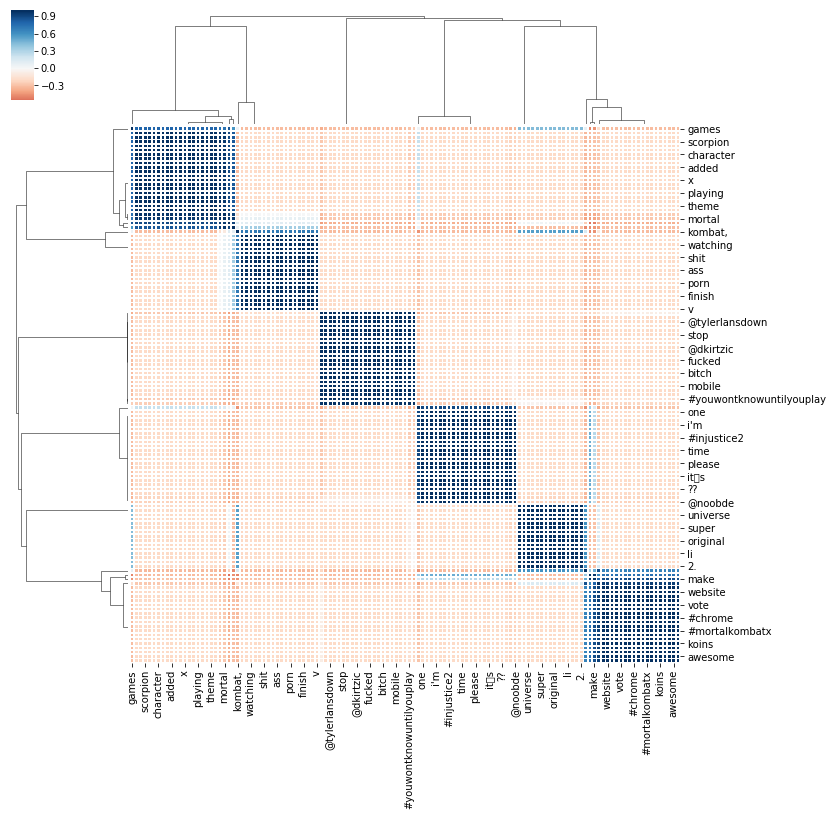

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [16]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

C:\Users\Glynis\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
1      28.658221        1       1  138.322708   60.056503
4      28.579017        1       2  -97.225777   38.425488
3      17.711117        1       3   12.690496  134.809433
2       8.375859        1       4  106.050392  -82.525581
5       8.340792        1       5   24.062399   10.974804
0       8.334994        1       6  -39.525555  -95.894432, topic_info=      Category         Freq                      Term        Total  loglift  \
term                                                                          
42     Default  5735.000000                      miss  5735.000000  30.0000   
7987   Default  1794.000000                        sf  1794.000000  29.0000   
31     Default  2394.000000                    mortal  2394.000000  28.0000   
30     Default  2171.000000                    kombat  2171.000000  27.0000   
14393  Default  1082.000000                   coming!  1082.000000  26.0000   
1333   Default  1089.000000                      epic  1089.000000  25.0000   
3169   Default  1075.000000                         v  1075.000000  24.0000   
14898  Default  1070.000000                franchise.  1070.000000  23.0000   
331    Default  1590.000000                       new  1590.000000  22.0000   
569    Default  1242.000000                        mk  1242.000000  21.0000   
66046  Default  1315.000000  #youwontknowuntilyouplay  1315.000000  20.0000   
48     Default   443.000000                  @youtube   443.000000  19.0000   
58     Default   412.000000                     video   412.000000  18.0000   
0      Default   525.000000               #injustice2   525.000000  17.0000   
167    Default   493.000000              @netherrealm   493.000000  16.0000   
56     Default   228.000000                     liked   228.000000  15.0000   
254    Default   231.000000                         x   231.000000  14.0000   
61     Default   222.000000                      like   222.000000  13.0000   
336    Default   697.000000             #mortalkombat   697.000000  12.0000   
3748   Default   214.000000                      vote   214.000000  11.0000   
13864  Default   208.000000                   #chrome   208.000000  10.0000   
38280  Default   207.000000               difference!   207.000000   9.0000   
168    Default   307.000000                   @noobde   307.000000   8.0000   
54     Default   126.000000                       via   126.000000   7.0000   
204    Default   177.000000                 injustice   177.000000   6.0000   
6958   Default   155.000000                 subscribe   155.000000   5.0000   
20727  Default   141.000000                   website   141.000000   4.0000   
2649   Default   250.000000                       may   250.000000   3.0000   
128    Default   276.000000                       get   276.000000   2.0000   
247    Default    98.000000                     added    98.000000   1.0000   
...        ...          ...                       ...          ...      ...   
5208    Topic6     3.783155                         k     3.890132   2.4568   
6278    Topic6     3.530084            @streetfighter     3.632143   2.4562   
5750    Topic6     3.763845                       job     3.873205   2.4561   
4187    Topic6     3.557544                     thats     3.663211   2.4554   
1357    Topic6     3.596306                  pictures     3.704157   2.4552   
578     Topic6     3.750222                       idk     3.865182   2.4545   
2061    Topic6     3.308575                       wtf     3.412621   2.4537   
5938    Topic6     3.276305                      pics     3.380707   2.4533   
910     Topic6     3.578509                     sweet     3.692757   2.4533   
1938    Topic6     3.395466                        mo     3.507418   2.4523   
8657    Topic6     3.144491                   beating     3.249741   2.4518   
2552    Topic6   